#Cover Page

### Predicting Credit Defaults of Clients
## Jenna Vannett
### jvannett@lion.lmu.edu
###The data set can be found on kaggle using this link www.kaggle.com/uciml/default-of-credit-card-clients-dataset
###Citation for data set: “Default of Credit Card Clients Dataset.” Kaggle, 3 Nov. 2016, www.kaggle.com/uciml/default-of-credit-card-clients-dataset.

# Executive Summary

    Credit companies make money by lending money to their clients, with the agreement that it will be paid back within a certain time frame. However, oftentimes clients do not pay back the money they owe on time or at all. This causes credit companies to lose money. The purpose of this project is to predict which clients are most likely to default on their payments, based on six months their credit history, as well as several demographic factors. It aims to predict which demographic features and past behaviors best predict whether clients will default on their payments, with the ultimate goal of providing the information credit companies need to avoid taking clients who are likely to default, while accepting as many clients as possible who are unlikely to default.
    I employed Machine learning models using the Python programming language in order to make these predictions with as much precision as possible. These models analyze 80% of the data set to predict whether clients will default, and use the remaining 20% of the data set to test the performance of the model. Models' performance are measured based on how accurate they are, how well they predict whether a client will default, how well they predict whether a client will not default, and their ability to distinguish between the two groups.
    The results from these models showed that people with lower credit limits and lower bills were more likely to default than those with higher limits and bills. This makes sense intuitively since those with higher credit limits and higher spending likely have more expendable income, and therefore do not deal with many of the financial hardships of those with lower limits. Additionally, clients around their mid 20s to mid 40s are less likely to default than clients at ages closer to the younger or older end of the spectrum. The best models were able to predict whether a client would default over half of the time, with the ability to distinguish between the two groups around 72% of the time. It is also notable that one of the most determining traits as to whether a client will default is the amount they paid during the first month. This indicated that it may not be necessary to have a full six months of data in order to predict whether a client will default.
    In order to optimize the clients they accept, the credit company should be weary of people who are younger than 25 and older that 45. Additionally, they could have a "trial period" for new clients, and should start all clients with a very low credit limit, as behavior during the first month will be useful in predicting whether a client will default.

#Feature Information

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (0=decline to answer 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (0= decline to answer 1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)



#Introduction

Purpose of the project:

1. Which clients are most likely to default on their credit card payments
2. Which demographic features and/or past behavior best predict whether a client will default on their credit card payments.
3. What are some stratigies creditors can employ to avoid taking clients who are likely to default without losing clients who are unlikely to default?

Why these questions matter: to a credit company. They do not want to accept clients who are likely to default a credit payment because it causes them to lose money. They also do not want to reject potential clients who are likely to stay up to date with payments, because they will lose the opportunity cost of working with those clients. These predictions can also be used to determine credit limits, allowing smaller limits for clients who are likely to default, so the company wont lose too much money. They can also give larger limits to those who are not likely to default.


This report fulfills this purpose by determining the likelyhood of a client defaulting on their payments based on their demographic factors and past history. It not only predicts which clients will default in future months, but also outlines the most important features of a client that determine whether they will default.

#Importing and Cleaning Data

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
credit = pd.read_excel('default of credit card clients.xls', header=None, index=False) #header=None because there is a header that is not descriptive
credit.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
3,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [97]:
credit = credit.iloc[1:]#remove first row so column names are descriptive
credit.columns = credit.iloc[0] #make first row column names
credit=credit.iloc[1:] #delete first row again as it is a duplicate of column names
credit.head()

1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
3,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
5,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
#turn columns into numeric data types in order to aggregate
credit[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = credit[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].apply(pd.to_numeric)

In [99]:
#both 5 and 6 in marriage indicate an unknown value
credit['EDUCATION'] = credit['EDUCATION'].replace(6, 5)
#make sure it works
credit['EDUCATION'].describe()


count    30000.000000
mean         1.851433
std          0.782463
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: EDUCATION, dtype: float64

In [100]:
credit.nunique()#see the number of unique records by column
credit.info()#look for null records - there are no nulls in this data set
credit.describe()#basic stats for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 2 to 30001
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.851433,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.489129,0.782463,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,2.000000,5.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


#Feature Engineering

In [101]:
#create new column, which shows the difference between the limit balance and average bill amount
#maybe when the bill is close to the limit bal, or if LIMIT_DIFF is low, there will be some pattern
credit['AVG_BILL'] = credit[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
credit['LIMIT_DIFF'] = credit['LIMIT_BAL']-credit['AVG_BILL']
credit.head()

1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AVG_BILL,LIMIT_DIFF
2,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1284.000000,18716.000000
3,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,2846.166667,117153.833333
4,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,16942.166667,73057.833333
5,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,38555.666667,11444.333333
6,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,18223.166667,31776.833333


In [102]:
#create column that shows number of times out of the six months a client paid late
def count_values_in_range(series, range_min, range_max):
   return series.between(left=range_min, right=range_max).sum()
   
range_min, range_max = 1, 8

credit["N_PAID_LATE"] = credit[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].apply(
    func=lambda row: count_values_in_range(row, range_min, range_max), axis=1)

credit.head()


1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AVG_BILL,LIMIT_DIFF,N_PAID_LATE
2,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1284.000000,18716.000000,2
3,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,2846.166667,117153.833333,2
4,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,16942.166667,73057.833333,0
5,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,38555.666667,11444.333333,0
6,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,18223.166667,31776.833333,0


#Data Exploration

In [103]:
print(credit['LIMIT_BAL'].describe())
print('mode:', credit['LIMIT_BAL'].mode())
#although the mean appears to be high, it is because of a few high outliers

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64
mode: 0    50000
dtype: int64


Text(0.5, 1.0, 'Distribution of Limit Balances')

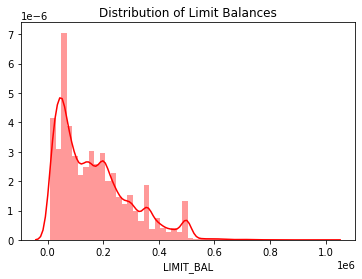

In [104]:
#plot the distribution of limit bal
sns.distplot(credit['LIMIT_BAL'],color='red')
plt.title('Distribution of Limit Balances')

Patterns in Payment status

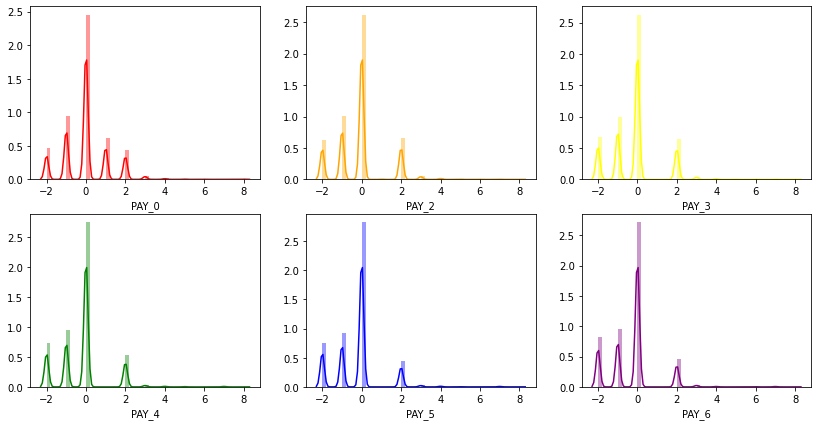

In [105]:
credit[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()
plt.figure(figsize=(14,7))
plt.subplot(2,3,1)
sns.distplot(credit['PAY_0'],color='red')
plt.subplot(2,3,2)
sns.distplot(credit['PAY_2'],color='orange')
plt.subplot(2,3,3)
sns.distplot(credit['PAY_3'],color='yellow')
plt.subplot(2,3,4)
sns.distplot(credit['PAY_4'],color='green')
plt.subplot(2,3,5)
sns.distplot(credit['PAY_5'],color='blue')
plt.subplot(2,3,6)
sns.distplot(credit['PAY_6'],color='purple')

Text(0.5, 0, 'Average Payment Status')

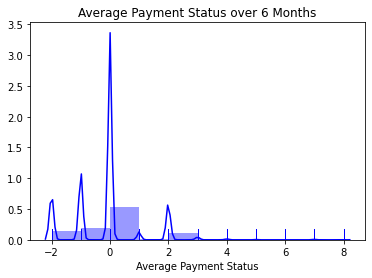

In [106]:
#plot the distribution of payments
avg_pay = credit.groupby('ID')[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean()
sns.distplot(avg_pay, bins=10, rug=True,color='blue')
plt.title('Average Payment Status over 6 Months')
plt.xlabel('Average Payment Status')
#shows that the most popular option is to pay on time-payment patterns are consistent over each of the 6 mmonths

Demographic Factors

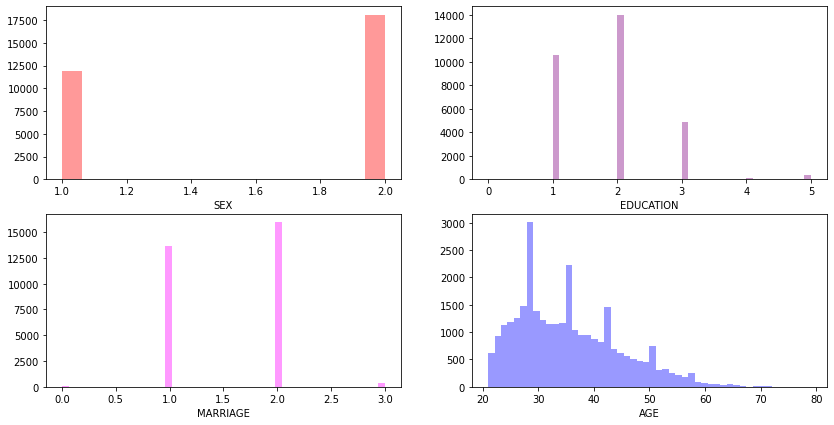

In [107]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.distplot(credit['SEX'],color='red', kde=False) #there are more females than males
plt.subplot(2,2,2)
sns.distplot(credit['EDUCATION'],color='purple',kde=False)#most have college, followed by grad school, followed by high school
plt.subplot(2,2,3)
sns.distplot(credit['MARRIAGE'],color='magenta',kde=False) #around the same are married and not married
plt.subplot(2,2,4)
sns.distplot(credit['AGE'],color='blue',kde=False)#ages vary a lot but most are around 30, would be easier to see with more detail

Text(0, 0.5, 'Number of Clients')

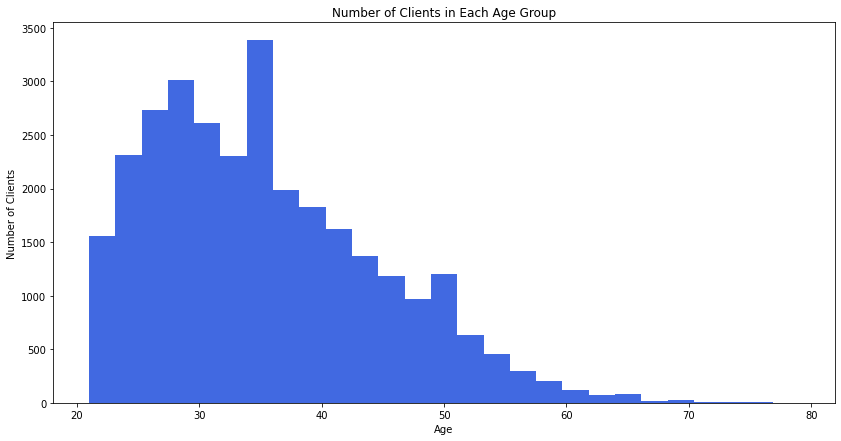

In [108]:
#more detailed info on age
plt.figure(figsize=(14,7))
age_frequency = credit.groupby('AGE')['ID'].count().sort_values(ascending=True)
plt.hist(credit['AGE'],color='royalblue', bins=27)
plt.title('Number of Clients in Each Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Clients')

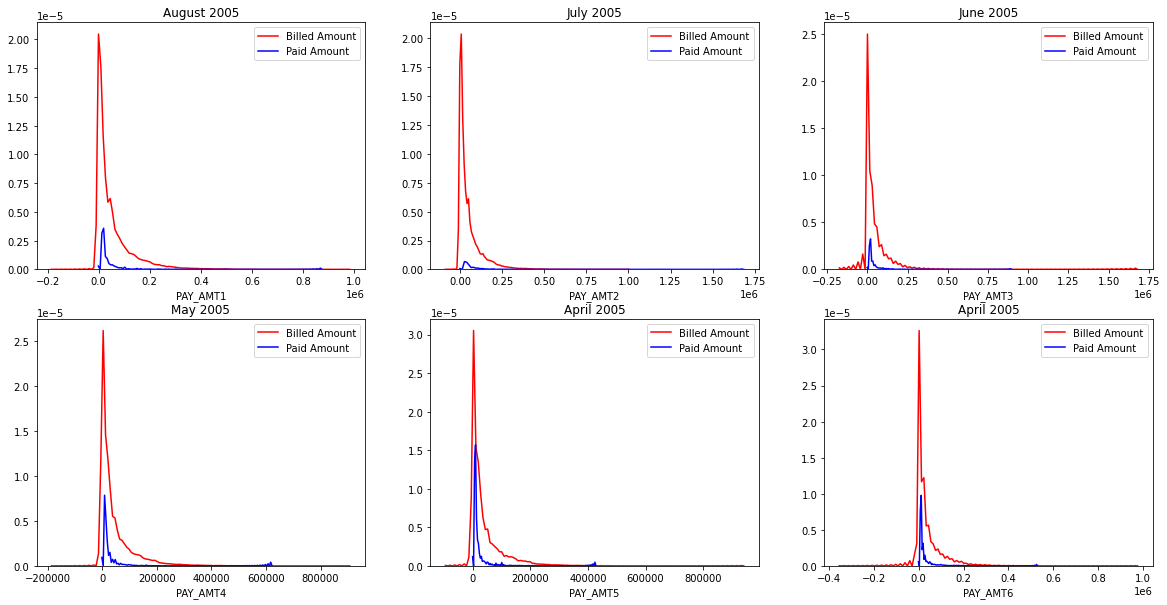

In [109]:
#comparing amount billed to amount paid
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.distplot(credit['BILL_AMT1'],color='red', hist=False, label='Billed Amount')
sns.distplot(credit['PAY_AMT1'], color='blue', hist=False, label='Paid Amount')
plt.title('August 2005')
plt.legend()

plt.subplot(2,3,2)
sns.distplot(credit['BILL_AMT2'],color='red', hist=False, label='Billed Amount')
sns.distplot(credit['PAY_AMT2'], color='blue', hist=False, label='Paid Amount')
plt.title('July 2005')
plt.legend()


plt.subplot(2,3,3)
sns.distplot(credit['BILL_AMT3'],color='red', hist=False, label='Billed Amount')
sns.distplot(credit['PAY_AMT3'], color='blue', hist=False, label='Paid Amount')
plt.title('June 2005')
plt.legend()


plt.subplot(2,3,4)
sns.distplot(credit['BILL_AMT4'],color='red', hist=False, label='Billed Amount')
sns.distplot(credit['PAY_AMT4'], color='blue', hist=False, label='Paid Amount')
plt.title('May 2005')
plt.legend()


plt.subplot(2,3,5)
sns.distplot(credit['BILL_AMT5'],color='red', hist=False, label='Billed Amount')
sns.distplot(credit['PAY_AMT5'], color='blue', hist=False, label='Paid Amount')
plt.title('April 2005')
plt.legend()


plt.subplot(2,3,6)
sns.distplot(credit['BILL_AMT6'],color='red', hist=False, label='Billed Amount')
sns.distplot(credit['PAY_AMT6'], color='blue', hist=False, label='Paid Amount')
plt.title('April 2005')
plt.legend()

plt.show()

#in general, when the billed amount is higher, the disparency between paid and billed amount is higher. however, maybe this analysis should be done with just people who defaulted

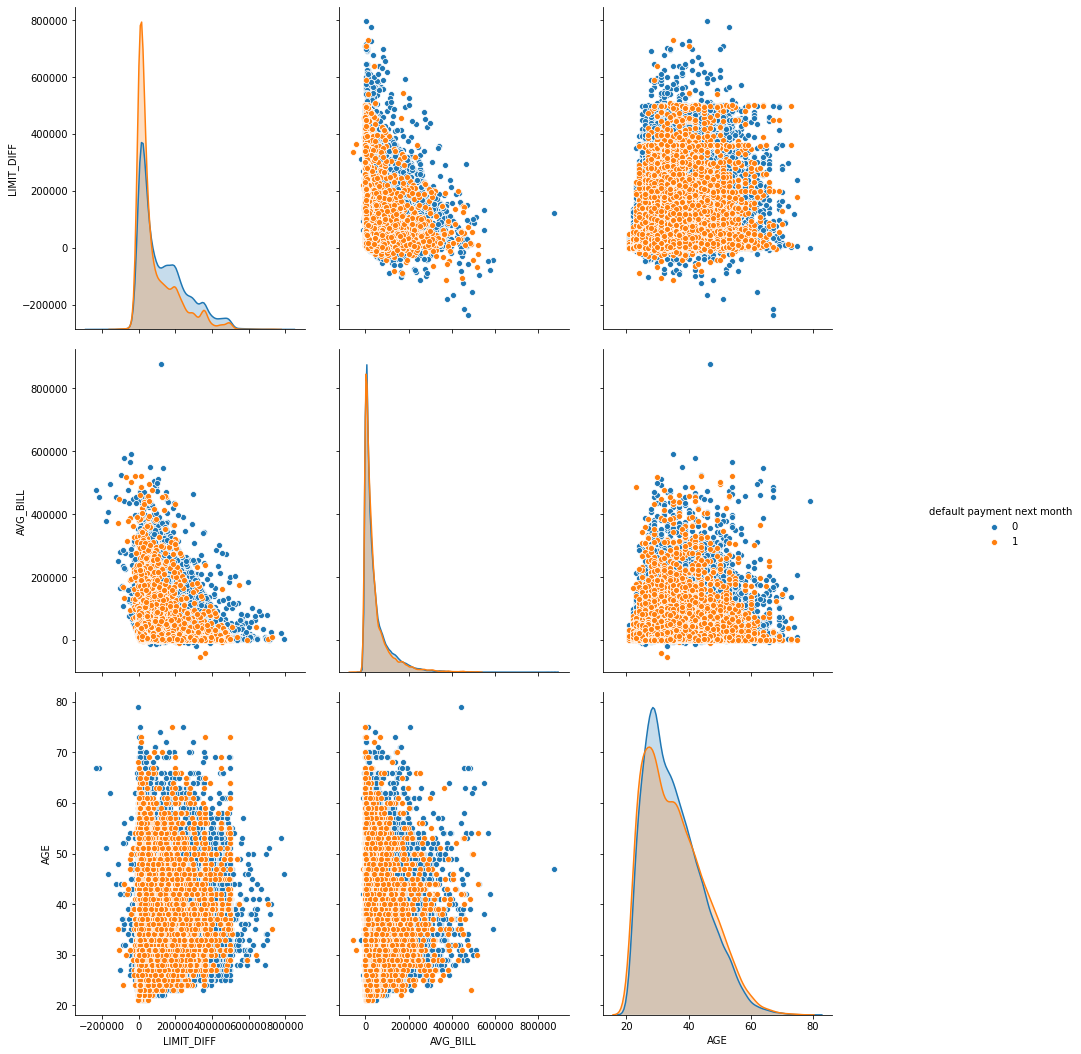

In [110]:
pplot = sns.pairplot(credit, hue='default payment next month', vars=['LIMIT_DIFF', 'AVG_BILL','AGE'])
pplot.fig.set_size_inches(15,15)

#Feature Selection

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, precision_recall_curve,plot_precision_recall_curve, roc_curve,plot_roc_curve
from sklearn.svm import SVC 
from sklearn import metrics
catcol = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','AVG_BILL', 'LIMIT_DIFF', 'N_PAID_LATE']
y = credit['default payment next month']
y = np.array(y).astype(int) #makes y the correct data type for future analyses
X = credit[catcol]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the training and testing data set

In [112]:
#removing columns with low variance
credit_norm = X/X.mean()
print(credit_norm.var())
#there was not any columns with particularly low variance, so no need to do anything else here

1
ID                0.333322
LIMIT_BAL         0.600137
SEX               0.093021
EDUCATION         0.178612
MARRIAGE          0.113131
AGE               0.067478
PAY_0          4528.415771
PAY_2            80.099062
PAY_3            51.859719
PAY_4            28.071043
PAY_5            18.121218
PAY_6            15.606371
BILL_AMT1         2.066537
BILL_AMT2         2.094494
BILL_AMT3         2.175938
BILL_AMT4         2.211228
BILL_AMT5         2.274630
BILL_AMT6         2.347227
PAY_AMT1          8.552844
PAY_AMT2         15.142014
PAY_AMT3         11.352276
PAY_AMT4         10.537477
PAY_AMT5         10.133949
PAY_AMT6         11.618428
AVG_BILL          1.978283
LIMIT_DIFF        1.057969
N_PAID_LATE       3.471610
dtype: float64


In [113]:
#removing highly correlated features to minimize heteroskedasticity

correlation = X.corr().abs()
print(correlation) #check which attributes are correlated

mask = np.triu(np.ones_like(correlation, dtype=bool))

new_df = correlation.mask(mask) #creates new data frame

drop = [x for x in new_df.columns if any(new_df[x]>.90)] #the columns to drop are with correlation above .9

print(drop)

1                  ID  LIMIT_BAL       SEX  ...  AVG_BILL  LIMIT_DIFF  N_PAID_LATE
1                                           ...                                   
ID           1.000000   0.026179  0.018497  ...  0.023723    0.015046     0.019853
LIMIT_BAL    0.026179   1.000000  0.024755  ...  0.302044    0.878039     0.236763
SEX          0.018497   0.024755  1.000000  ...  0.025920    0.038502     0.043760
EDUCATION    0.039096   0.221047  0.014793  ...  0.007259    0.231251     0.050050
MARRIAGE     0.029079   0.108139  0.031389  ...  0.024507    0.099045     0.008300
AGE          0.018678   0.144713  0.090874  ...  0.054981    0.121405     0.015356
PAY_0        0.030575   0.271214  0.057643  ...  0.191803    0.375555     0.635398
PAY_2        0.011215   0.296382  0.070771  ...  0.238182    0.424754     0.661151
PAY_3        0.018494   0.286123  0.066096  ...  0.235960    0.413075     0.653741
PAY_4        0.002735   0.267460  0.060173  ...  0.244561    0.398176     0.634303
PAY_

In [0]:
#apply new columns and re initialize test and train sets
credit = credit[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'AVG_BILL', 'LIMIT_DIFF', 'N_PAID_LATE']]

catcol = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'AVG_BILL', 'LIMIT_DIFF', 'N_PAID_LATE']

y = credit['default payment next month']
y = np.array(y).astype(int) #makes y the correct data type for future analyses
X = credit[catcol]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the training and testing data set

In [115]:
#feature selection based on random forest classifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Select 9 features with RFE on a RandomForestClassifier, drop 3 features on each step
randomf_rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=9, step=3, verbose=1)
randomf_rfe.fit(X_train, y_train)

# Calculate the accuracy on the test set
rf_acc = randomf_rfe.score(X_test, y_test)
print('Test set accuracy: {}'.format(rf_acc))

mask = randomf_rfe.support_
print('There were {} features selected'.format(sum(mask)))

features = X.loc[: , mask]
print(features.columns)

Fitting estimator with 21 features.
Fitting estimator with 18 features.
Fitting estimator with 15 features.
Fitting estimator with 12 features.
Test set accuracy: 0.8155
There were 9 features selected
Index(['ID', 'AGE', 'PAY_0', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'AVG_BILL',
       'LIMIT_DIFF', 'N_PAID_LATE'],
      dtype='object', name=1)


In [0]:
#apply new columns to df and re initialize the testing and training set

credit = credit[['ID', 'AGE', 'PAY_0', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'AVG_BILL', 'LIMIT_DIFF', 'N_PAID_LATE', 'default payment next month']]

catcol = ['ID', 'AGE', 'PAY_0', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'AVG_BILL','LIMIT_DIFF', 'N_PAID_LATE']
y = credit['default payment next month']
y = np.array(y).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20, stratify=y)

#Logistic Regression

accuracy for training set:  0.8099166666666666
Test set accuracy: 0.81
Confusion Matrix:
[[4479  194]
 [ 963  364]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4673
           1       0.65      0.27      0.39      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.62      0.64      6000
weighted avg       0.79      0.81      0.78      6000

Accuracy: 0.8071666666666667
Precision: 0.6523297491039427
Recall: 0.2743029389600603


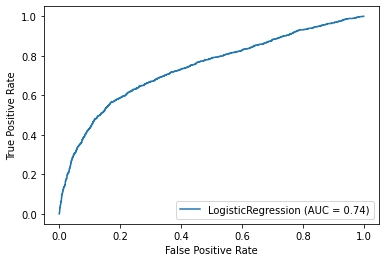

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics as m

#use standard scaler to standardize the data
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

#create new train and test variables that are standardized
standardized_X_train = s.fit_transform(X_train)
standardized_X_test = s.transform(X_test)


lor = LogisticRegression(max_iter=1000) #create a logistic regression object
lor.fit(standardized_X_train, y_train)

lor_y_pred=lor.predict(standardized_X_test)

acc_train= accuracy_score(y_train, lor.predict(standardized_X_train))
print('accuracy for training set: ', acc_train)
# Compute test set accuracy  
acc_test = accuracy_score(y_test, lor_y_pred)
print("Test set accuracy: {:.2f}".format(acc_test))

lor_cmatrix = m.confusion_matrix(y_test, lor_y_pred)
print('Confusion Matrix:')
print(lor_cmatrix)
print(classification_report(y_test, lor_y_pred))
plot_roc_curve(lor, standardized_X_test, y_test)

print("Accuracy:",m.accuracy_score(y_test, lor_y_pred))
print("Precision:",m.precision_score(y_test, lor_y_pred))
print("Recall:",m.recall_score(y_test, lor_y_pred))
#high accuracu but low recall may be an indicator of imbalancing

Text(0.5, 1.0, 'LOR Confusion Matrix')

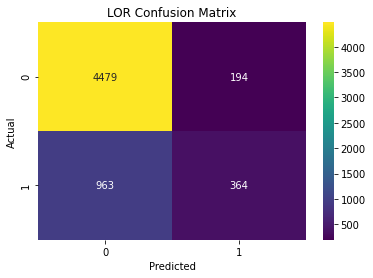

In [118]:
# create heatmap
sns.heatmap(pd.DataFrame(lor_cmatrix), annot=True, cmap="viridis",fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('LOR Confusion Matrix')

Before OverSampling, count of '1': 5309
Before OverSampling, count of '0': 18691 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, count of '1': 18691
After OverSampling, count of '0': 18691
[[4479  194]
 [ 963  364]]
Accuracy: 0.8071666666666667
Precision: 0.6523297491039427
Recall: 0.2743029389600603
accuracy for training set:  0.701594350222032
Test set accuracy: 0.81
Confusion Matrix:
[[4479  194]
 [ 963  364]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4673
           1       0.65      0.27      0.39      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.62      0.64      6000
weighted avg       0.79      0.81      0.78      6000



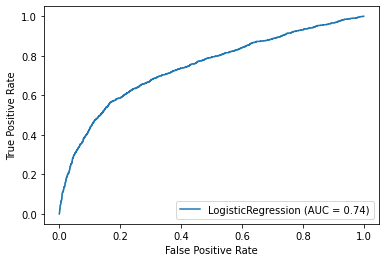

In [119]:
#using smote to see if oversampling improves the model
from imblearn.over_sampling import SMOTE 


print("Before OverSampling, count of '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, count of '0': {} \n".format(sum(y_train == 0))) 

sm = SMOTE(random_state = 2) 
X_train_os, y_train_os = sm.fit_sample(standardized_X_train, y_train.ravel()) #returns continuous flattened array

print("After OverSampling, count of '1': {}".format(sum(y_train_os == 1))) 
print("After OverSampling, count of '0': {}".format(sum(y_train_os == 0))) 


lor = LogisticRegression()
lor.fit(X_train_os, y_train_os)

print(lor_cmatrix)
print("Accuracy:",m.accuracy_score(y_test, lor_y_pred))
print("Precision:",m.precision_score(y_test, lor_y_pred))
print("Recall:",m.recall_score(y_test, lor_y_pred))

acc_train_os= accuracy_score(y_train_os, lor.predict(X_train_os))
print('accuracy for training set: ', acc_train_os)
acc_test_os = accuracy_score(y_test, lor_y_pred)
print("Test set accuracy: {:.2f}".format(acc_test_os))

print('Confusion Matrix:')
print(lor_cmatrix)

print(classification_report(y_test, lor_y_pred))
plot_roc_curve(lor, standardized_X_test, y_test)

#oversampling did not improve the model

# Naive Bayes

accuracy for training set:  0.4225
Test set accuracy: 0.42
Confusion Matrix:
[[1434 3239]
 [ 228 1099]]
              precision    recall  f1-score   support

           0       0.86      0.31      0.45      4673
           1       0.25      0.83      0.39      1327

    accuracy                           0.42      6000
   macro avg       0.56      0.57      0.42      6000
weighted avg       0.73      0.42      0.44      6000



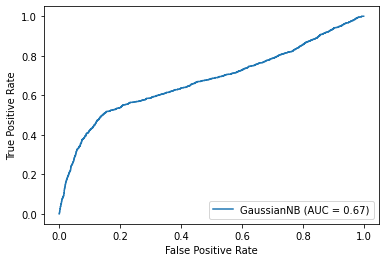

In [120]:
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_y_pred = nb.predict(X_test)
nb_y_predproba = nb.predict_proba(X_test)[:,1]



lor_y_pred=lor.predict(standardized_X_test)

acc_train_nb= accuracy_score(y_train, nb.predict(X_train))
print('accuracy for training set: ', acc_train_nb)
# Compute test set accuracy  
acc_test_nb = accuracy_score(y_test, nb_y_pred)
print("Test set accuracy: {:.2f}".format(acc_test_nb))

nb_cmatrix = m.confusion_matrix(y_test, nb_y_pred)
print('Confusion Matrix:')
print(nb_cmatrix)
print(classification_report(y_test, nb_y_pred))
plot_roc_curve(nb, standardized_X_test, y_test)
#although this model may need oversampling, but this model is already performing so poorly that it is unlikely it will make a significant difference

Text(0.5, 1.0, 'NB Confusion Matrix')

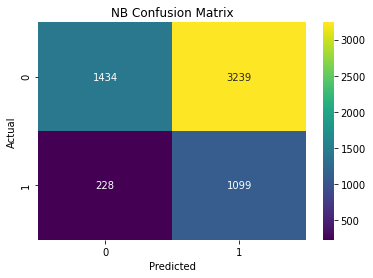

In [121]:
# create heatmap
sns.heatmap(pd.DataFrame(nb_cmatrix), annot=True, cmap="viridis",fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('NB Confusion Matrix')

#CART Classification and Regression Trees

training accuracy:  0.8207916666666667
Test accuracy: 0.82
Confusion Matrix:
[[4485  188]
 [ 905  422]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.69      0.32      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



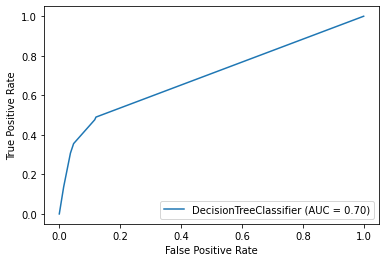

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
SEED=1#set the seed

dt = DecisionTreeClassifier(max_depth=3.9, random_state=SEED)

dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)

accuracy_cart= accuracy_score(y_train, dt.predict(X_train))
print('training accuracy: ', accuracy_cart)
accuracy_test = accuracy_score(y_test, y_pred1)
print('Test accuracy: {:.2f}'.format(accuracy_test))

cart_cmatrix = m.confusion_matrix(y_test, y_pred1)
print('Confusion Matrix:')
print(cart_cmatrix)
print(classification_report(y_test, y_pred1))
plot_roc_curve(dt, standardized_X_test, y_test)

Text(0.5, 1.0, 'CART Confusion Matrix')

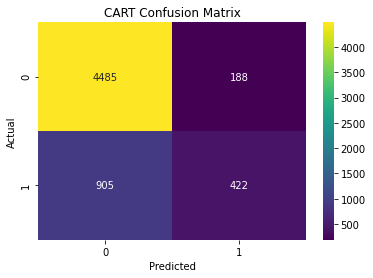

In [123]:
# create heatmap
sns.heatmap(pd.DataFrame(cart_cmatrix), annot=True, cmap="viridis",fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('CART Confusion Matrix')

In [124]:
#tuning the model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param = {'max_depth': [2,4], 'min_samples_leaf': [0.5, 0.15]}


dt = DecisionTreeClassifier()
grid = GridSearchCV(estimator=dt,
                    param_grid=param,
                    scoring='roc_auc',
                    cv=5,
                    n_jobs=-1)

grid.fit(standardized_X_train, y_train)
best_est = grid.best_estimator_

y_pred_tune= best_est.predict(X_test)
y_pred_proba = best_est.predict_proba(X_test)[:,1]

test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('Accuracy score', accuracy_score(y_test, y_pred_tune))
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Accuracy score 0.7838333333333334
Test set ROC AUC score: 0.686


#Hard/Soft Voting

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
# Set seed
SEED=1

lor = LogisticRegression(random_state=SEED)
knn = KNN(n_neighbors=22)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)
classes = [('Logistic Regression', lor), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]


for clf_name, clf in classes:    
    clf.fit(standardized_X_train, y_train)    
    y_pred = clf.predict(standardized_X_test)
    accuracy = accuracy_score(y_test, y_pred) 
    print('{:s} : {:.3f}'.format(clf_name, accuracy))


voting_classifier = VotingClassifier(estimators=classes)#create a voting classifier object
voting_classifier.fit(standardized_X_train, y_train) #fit that object to the set

y_pred = voting_classifier.predict(standardized_X_test)


accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier:',accuracy)

Logistic Regression : 0.807
K Nearest Neighbours : 0.815
Classification Tree : 0.784
Voting Classifier: 0.8145


[[4470  203]
 [ 910  417]]
training accuracy:  0.7787916666666667
Test accuracy: 0.81
Confusion Matrix:
[[4470  203]
 [ 910  417]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.67      0.31      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.81      0.79      6000



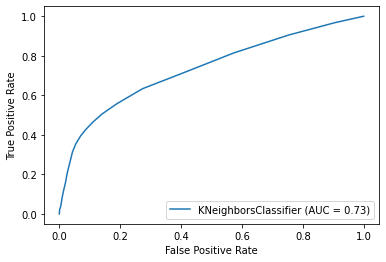

In [126]:
knn_y_pred = knn.predict(standardized_X_test)
cnf_matrix_knn = metrics.confusion_matrix(y_test, knn_y_pred)
print(cnf_matrix_knn)

accuracy_knn= accuracy_score(y_train, knn.predict(X_train))
print('training accuracy: ', accuracy_knn)
accuracy_test = accuracy_score(y_test, knn_y_pred)
print('Test accuracy: {:.2f}'.format(accuracy_test))

knn_cmatrix = m.confusion_matrix(y_test, knn_y_pred)
print('Confusion Matrix:')
print(knn_cmatrix)
print(classification_report(y_test, knn_y_pred))
plot_roc_curve(knn, standardized_X_test, y_test)
#low recall may be an indicator of an imbalancing problem

Text(0.5, 1.0, 'KNN Confusion Matrix')

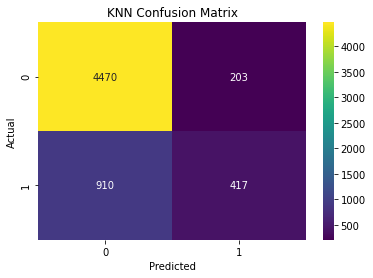

In [127]:
# create heatmap
sns.heatmap(pd.DataFrame(knn_cmatrix), annot=True, cmap="viridis",fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('KNN Confusion Matrix')

training accuracy:  0.7748381574019582
Test accuracy: 0.69
Confusion Matrix:
[[3322 1351]
 [ 485  842]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      4673
           1       0.38      0.63      0.48      1327

    accuracy                           0.69      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.76      0.69      0.72      6000



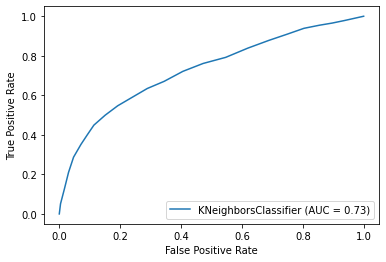

In [128]:
#KNN with SMOTE - oversampling to fix imbalancing problem

knn_smote = KNN(n_neighbors=22)
knn_smote.fit(X_train_os,y_train_os)
knn_y_pred2 = knn_smote.predict(standardized_X_test)

accuracy_knn_smote= accuracy_score(y_train_os, knn_smote.predict(X_train_os))
print('training accuracy: ', accuracy_knn_smote)
accuracy_test_smote = accuracy_score(y_test, knn_y_pred2)
print('Test accuracy: {:.2f}'.format(accuracy_test_smote))

cnf_matrix_knn_smote = metrics.confusion_matrix(y_test, knn_y_pred2)
print('Confusion Matrix:')
print(cnf_matrix_knn_smote)
print(classification_report(y_test, knn_y_pred2))
plot_roc_curve(knn_smote, standardized_X_test, y_test)


#higher recall but lower precision
#may suffer from overfitting, since training accuracy> test accuracy

Text(0.5, 15.0, 'Predicted')

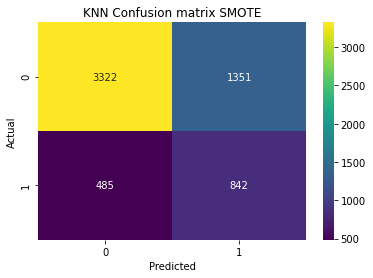

In [129]:
sns.heatmap(pd.DataFrame(cnf_matrix_knn_smote), annot=True, cmap="viridis" ,fmt='g')

plt.title('KNN Confusion matrix SMOTE', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#Random Forest Classifier

Test set accuracy: 0.8143333333333334, OOB accuracy: 0.8125
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000



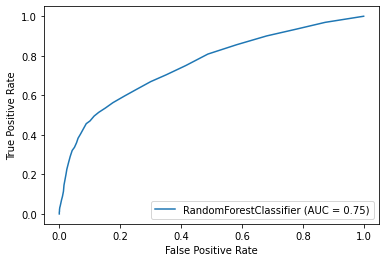

In [130]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=40,
                            oob_score= True,
                            random_state=2)
               
rf.fit(standardized_X_train, y_train) 

rf_y_pred = rf.predict(standardized_X_test)

# Evaluate OOb and test accuracy
acc_test = accuracy_score(y_test, rf_y_pred)
acc_oob = rf.oob_score_
print('Test set accuracy: {}, OOB accuracy: {}'.format(acc_test, acc_oob))
print(classification_report(y_test, rf_y_pred))
plot_roc_curve(rf, standardized_X_test, y_test)

[[4408  265]
 [ 849  478]]
Accuracy: 0.8143333333333334
Precision: 0.6433378196500673
Recall: 0.3602110022607385


Text(0.5, 257.44, 'Predicted label')

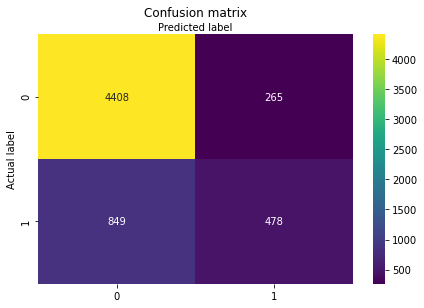

In [131]:
cnf_matrix_rf = metrics.confusion_matrix(y_test, rf_y_pred)
print(cnf_matrix_rf)
print("Accuracy:",metrics.accuracy_score(y_test, rf_y_pred))
print("Precision:",metrics.precision_score(y_test, rf_y_pred))
print("Recall:",metrics.recall_score(y_test, rf_y_pred))

fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

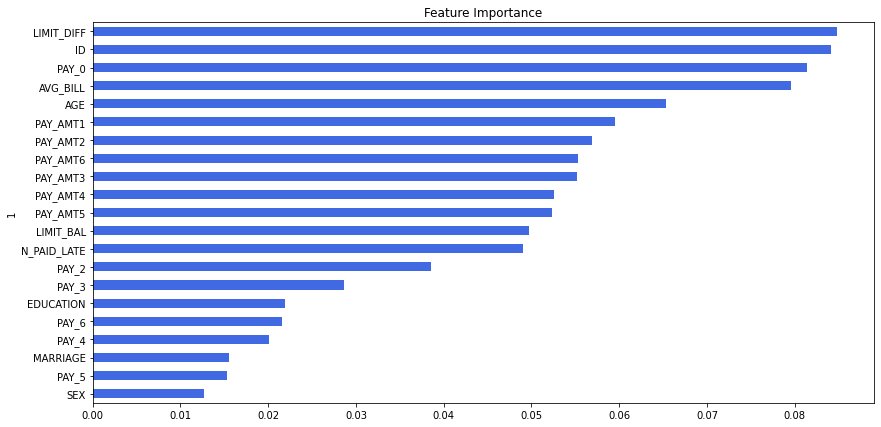

In [132]:
## visualize feature importance
from matplotlib import pyplot as plt
# Create a pd.Series of features importances
f_imp = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
sorted = f_imp.sort_values()


plt.figure(figsize=(14,7))
sorted.plot(kind='barh', color='royalblue')
plt.title('Feature Importance')
plt.show()

#Decision trees

training accuracy:  0.8243333333333334
Test accuracy: 0.82
Confusion Matrix:
[[4413  260]
 [ 842  485]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



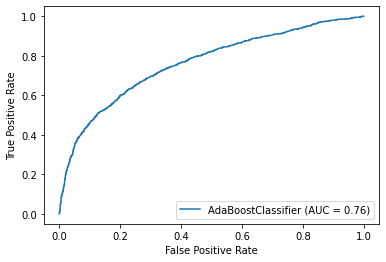

In [133]:
##AdaBoost: Adaptive Boosting
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=3, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=20, random_state=1)
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]
y_pred = ada.predict(X_test)

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

accuracy_ada = accuracy_score(y_train, ada.predict(X_train))
print('training accuracy: ', accuracy_ada)
accuracy_test = accuracy_score(y_test, y_pred)
print('Test accuracy: {:.2f}'.format(accuracy_test))

cnf_matrix_ada = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cnf_matrix_ada)
print(classification_report(y_test, y_pred))
plot_roc_curve(ada, X_test, y_test)

training accuracy:  0.8287916666666667
Test accuracy: 0.82
Confusion Matrix:
[[4451  222]
 [ 841  486]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.69      0.37      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



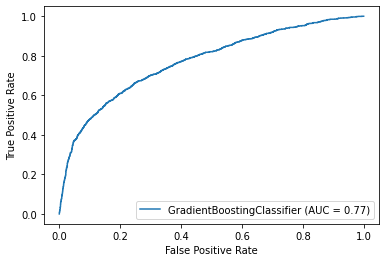

In [134]:
## Stochastic Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(max_depth=4, 
            subsample=0.8,
            n_estimators=50,
            random_state=1)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_pred_proba = gb.predict_proba(X_test)[:,1]

gb_roc_auc = roc_auc_score(y_test, y_pred_proba)

accuracy_gb = accuracy_score(y_train, gb.predict(X_train))
print('training accuracy: ', accuracy_gb)
accuracy_test_gb = accuracy_score(y_test, y_pred)
print('Test accuracy: {:.2f}'.format(accuracy_test_gb))

cnf_matrix_gb = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cnf_matrix_gb)
print(classification_report(y_test, y_pred))
plot_roc_curve(gb, X_test, y_test)

#Best Model and Practical Reccomendations

  The most effective model was the Stochastic Gradient Boosting Classifier. Although it had a relatively low recall for the positive class at 37%, it performed best on all of the other measures. It had a high recall for the negative class at 95%, and high precision for the negative and positive case at 84% and 69% respectively. It also had the highest score for the area under the ROC curve with 77%, meaning it was able to effectively classify instances in the data at different thresholds.

  My reccomendation to credit companies is that they pay attention to the important features from this model when they are considering taking on a new client. People between the ages of 25 and 45 should be considered lower risk, and those who would be granted a higher credit limit are also lower risk. Credit companies should assess the personal situation of the potential client, and see if there is any financial struggles going on for that client.
  One of the most crucial factors determining whether a client will default in the next month is the amount they pay during their first month as a client. This indicates that client companies should only lend out a small amount of credit for new clients, and it would be safer to raise credit limits if they prove that they will make their payments on time after the first month. If it is possible, they could also have a trial period for new clients, where they have a very limited contract during which their behavior is assessed. If they make their payments on time, they should be granted a longer contract.

#Summary and Conclusion

This project employed machine learning models to predict whether a client will default on their payments or not. It found that age, credit limit, and bill amount were the most crucial determinants as to whether a client will default. Although this model employed many machine learning models, if I had more time I would apply more to the data set to see if any of them predict better than the ones I implemented.

# Works Cited

 Waskom, Michael. “Visualizing the Distribution of a Dataset¶.” Visualizing the Distribution of a Dataset - Seaborn 0.10.1 Documentation, 2020, seaborn.pydata.org/tutorial/distributions.html.

Albon, Chris. “Replacing Values In Pandas.” Chris Albon, 20 Dec. 2017, chrisalbon.com/python/data_wrangling/pandas_replace_values/.

Albon, Chris. “Stacked Percentage Bar Plot In MatPlotLib.” Chris Albon, 20 Dec. 2017, chrisalbon.com/python/data_visualization/matplotlib_percentage_stacked_bar_plot/.

Asaithambi, Sudharsan. “Why, How and When to Scale Your Features.” Medium, GreyAtom, 22 Dec. 2017, medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e.

Josyula, Vikram JosyulaVikram. “How to Change a Figure's Size in Python Seaborn Package.” Stack Overflow, 1 July 1965, stackoverflow.com/questions/33446029/how-to-change-a-figures-size-in-python-seaborn-package.

Koehrsen, Will. “Automated Feature Engineering in Python.” Medium, Towards Data Science, 5 June 2018, towardsdatascience.com/automated-feature-engineering-in-python-99baf11cc219.

Koehrsen, Will. “Automated Feature Engineering in Python.” Medium, Towards Data Science, 5 June 2018, towardsdatascience.com/automated-feature-engineering-in-python-99baf11cc219.

Peitek, Norman. “Matplotlib - Stacked Bar Plots.” Future Studio, 2019, futurestud.io/tutorials/matplotlib-stacked-bar-plots.

Prabhakaran, Selva. “Matplotlib Histogram – How to Visualize Distributions in Python.” Machine Learning Plus, 23 Feb. 2019, www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/.

user9695260user9695260                    12999 bronze badges, jezrael, and jezraeljezrael                    501k3939 gold badges603603 silver badges627627 bronze badges. “Count Occurrences of a Character in a Column of Dataframe in Pandas.” Stack Overflow, 1 Nov. 2018, stackoverflow.com/questions/54927437/count-occurrences-of-a-character-in-a-column-of-dataframe-in-pandas.